In [1]:
import os
from statistics import mean

import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

In [2]:
def calculate_mean(data):
    return mean(data)


print(calculate_mean([1, 2.2, 0.3, 3.4, 7.9]))
print(calculate_mean([1.2, 3.8, 2.2, 8.2, 7.1]))

2.96
4.5


In [3]:
print(os.getcwd())

def calc_stats(file):
    """Return mean and median up to one decimal place."""
    data = np.loadtxt(file, delimiter=',')
    return np.round(np.mean(data), 1), np.round(np.median(data), 1)


# Run your `calc_stats` function with examples:
print(calc_stats('data1/data1.csv'))
print(calc_stats('data1/data2.csv'))

/Users/jetbrains/git/data-driven-astronomy/week1
(11.1, 11.4)
(11.4, 10.4)


In [4]:
def mean_datasets(files):
    """Find each cell mean across a series of data sets."""
    sum_data = sum(np.loadtxt(file, delimiter=',') for file in files)
    return np.round(sum_data/len(files), 1)
        

files1 = ['data1.csv', 'data2.csv', 'data3.csv']
files2 = ['data4.csv', 'data5.csv', 'data6.csv']
print(mean_datasets(['data2/' + file for file in files1]))
print(mean_datasets(['data2/' + file for file in files2]))

[[11.  11.9 13. ]
 [ 9.5  6.8  9.4]
 [ 7.2 11.1 12.5]
 [ 8.8  7.3  9.2]
 [16.6 10.6 10.3]]
[[-2.9  2.6  0.6 -5.4]
 [-4.4 -0.7  0.7 -0.2]
 [-1.7  2.5 -8.7 -5.4]]


(101, 100)


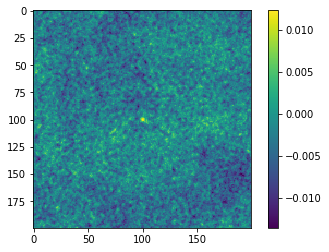

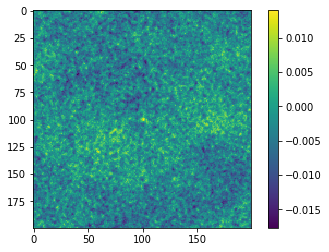

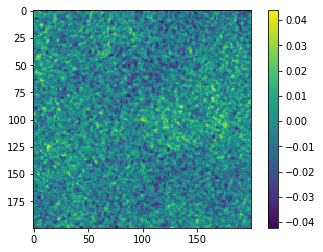

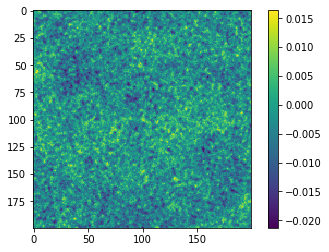

In [5]:
def load_fits(file):
    data = fits.open(file)[0].data
    return np.unravel_index(np.argmax(data, axis=None), data.shape)


bright = load_fits('data3/image1.fits')
print(bright)

for fits_file in os.listdir('data3'): 
    hdu_list = fits.open('data3/' + fits_file)
    hdu_data = hdu_list[0].data

    plt.imshow(hdu_data.T, cmap=plt.cm.viridis)
    plt.colorbar()
    plt.show()

0.017356586332122486


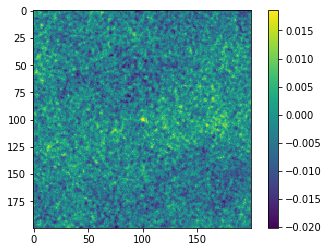

In [6]:
def mean_fits(files):
    """Calculate mean of the given set of fits files."""
    sum_data = sum(fits.open(file)[0].data for file in files)
    return sum_data/len(files)


fits_files = ['image0.fits', 'image1.fits', 'image2.fits']
fits_data = mean_fits(['data4/' + file for file in fits_files])
print(fits_data[100, 100])

plt.imshow(fits_data.T, cmap=plt.cm.viridis)
plt.colorbar()
plt.show()